In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

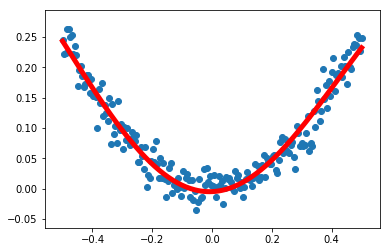

In [35]:
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层
weights_L1 = tf.Variable(tf.random_normal([1,10]))
bias_L1 = tf.Variable(tf.zeros([1,10]))
wx_plus_b_L1 = tf.matmul(x,weights_L1) + bias_L1
# 双曲函数作为激活函数
L1 = tf.nn.tanh(wx_plus_b_L1)

# 定义输出层
weights_L2 = tf.Variable(tf.random_normal([10,1]))
bias_L2 = tf.Variable(tf.zeros([1,1]))
wx_plus_b_L2 = tf.matmul(L1,weights_L2) + bias_L2
prediction = tf.nn.tanh(wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))

# 梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2001):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    prediction_value = sess.run(prediction,feed_dict={x:x_data})

# 画图
plt.figure()
plt.scatter(x_data,y_data)
plt.plot(x_data,prediction_value,'r-',lw=5)
plt.show()
